In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import Data

In [ ]:
# Read gas emissions data
file1 = open('climatewatch-usemissions.csv', 'r') 
emissionsDf = pd.read_csv(file1)  # used to combine all states and years
emissionsDf = emissionsDf.drop(range(0,3))
emissionsDf.columns = ["State", "Year", "GHG Emissions Excluding LUCF",	'GHG Emissions Including LUCF',	'CO2 (excluding LUCF)',	'CH4',	'N2O',	'F-Gas',	'Energy',	'Industrial Processes',	'Agriculture',	'Waste',	'Land Use and Forestry',	'Bunker Fuels',	'Electric Power',	'Commercial',	'Residential',	'Industrial',	'Transportation',	'Fugitive Emissions',	'State GDP (Million US$ (chained 1997/2005))',	'Population',	'Energy Use (Thous. tonnes oil eq. (ktoe))']
# remove rows of Hawaii Data
emissionsDf = emissionsDf[emissionsDf.State != 'Hawaii']
tempDf = pd.DataFrame(emissionsDf)      # used to split state wise

In [ ]:
# Read opinion survey data
file2 = open('YCOM_2020_Data.csv', encoding = 'ISO-8859-1')
surveyDf = pd.read_csv(file2)
happeningDf = surveyDf.happening

# drop national and District of Columbia
indicesToDrop = [0, 9, 12]
# drop counties
for i in range(52, len(happeningDf)):
  indicesToDrop.append(i)

happeningDf = happeningDf.drop(index = indicesToDrop)
happeningDf = happeningDf.reset_index()
happeningDf = happeningDf.drop(columns=['index'])
happeningDf

,happening
0,63.347
1,70.159
2,70.853
3,65.637
4,77.228
5,72.025
6,73.851
7,71.461
8,72.234
9,69.731


In [ ]:
# drop the State and Year
emissionsDf = emissionsDf.drop(columns=['State', 'Year'])
# change str values to float
emissionsDf = emissionsDf.astype(float)

# weigh the features by population
emissionsDf.iloc[:,0:18] = emissionsDf.iloc[:,0:18].div(emissionsDf.Population, axis=0)
emissionsDf.iloc[:,20] = emissionsDf.iloc[:,20].div(emissionsDf.Population, axis=0)

In [ ]:
emissionsDf.shape

(1479, 21)

In [ ]:
emissionsDf.head(5)

,GHG Emissions Excluding LUCF,GHG Emissions Including LUCF,CO2 (excluding LUCF),CH4,N2O,F-Gas,Energy,Industrial Processes,Agriculture,Waste,Land Use and Forestry,Bunker Fuels,Electric Power,Commercial,Residential,Industrial,Transportation,Fugitive Emissions,State GDP (Million US$ (chained 1997/2005)),Population,Energy Use (Thous. tonnes oil eq. (ktoe))
3,0.000035,0.000020,0.000028,0.000006,1.489889e-06,1.272142e-07,0.000032,8.500820e-07,1.839858e-06,8.989998e-07,-1.500507e-05,0.0,0.000012,6.062525e-07,7.983087e-07,0.000006,0.000007,4.093762e-06,83766.0,4050055.0,0.010363
4,0.000086,0.000081,0.000065,0.000020,5.033216e-07,6.653903e-08,0.000083,1.976349e-06,1.168218e-07,6.663707e-07,-4.406813e-06,0.0,0.000005,3.995095e-06,2.914877e-06,0.000029,0.000022,2.038675e-05,28772.0,553290.0,0.026602
5,0.000019,0.000018,0.000017,0.000001,9.446957e-07,2.242201e-07,0.000018,3.137621e-07,1.206492e-06,4.183521e-07,-9.878821e-07,0.0,0.000009,5.198594e-07,5.162364e-07,0.000001,0.000007,2.607448e-08,81606.0,3684097.0,0.006423
6,0.000031,0.000011,0.000022,0.000004,4.227785e-06,1.000345e-07,0.000023,4.885694e-07,6.763115e-06,7.539493e-07,-2.003752e-05,0.0,0.000009,6.918771e-07,1.085928e-06,0.000004,0.000007,3.604424e-07,44496.0,2356586.0,0.009153
7,0.000014,0.000012,0.000012,0.000001,7.877420e-07,8.534919e-08,0.000013,2.580579e-07,9.674698e-07,4.804590e-07,-2.250875e-06,0.0,0.000001,6.375796e-07,1.007667e-06,0.000002,0.000007,1.823187e-07,906103.0,29959515.0,0.006262


In [ ]:
# weigh the features by state population
intDf = tempDf.iloc[:, 2:20].astype(float)
tempRow = tempDf.iloc[:, 22].astype(float)
tempCols = tempDf.iloc[:, 21].astype(float)
tempDf.iloc[:, 2:20] = intDf.div(tempCols, axis = 0)
tempDf.iloc[:,22] = tempRow.div(tempCols, axis = 0) 
tempDf.shape

(1479, 23)

In [ ]:
# Alabama1
file1 = open('tempByStateAlabama.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Alabama subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Alabama'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
AlabamaMeans = df3.mean(axis = 0)
# find the 2018 data
Alabama2018 = df3.iloc[28,:]

# Alaska2
file1 = open('tempByStateAlaska.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Alaska subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Alaska'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
AlaskaMeans = df3.mean(axis = 0)
# find the 2018 data
Alaska2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = pd.concat([AlabamaMeans, AlaskaMeans], axis=1)
dfMeans = dfMeans.transpose()
# merge into one df for 2018
df2018 = pd.concat([Alabama2018, Alaska2018], axis=1)
df2018 = df2018.transpose()

# Arizona3
file1 = open('tempByStateArizona.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Arizona subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Arizona'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
ArizonaMeans = df3.mean(axis = 0)
# find the 2018 data
Arizona2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(ArizonaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Arizona2018, ignore_index=True)

# Arkansas4
file1 = open('tempByStateArkansas.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Arkansas subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Arkansas'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
ArkansasMeans = df3.mean(axis = 0)
# find the 2018 data
Arkansas2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(ArkansasMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Arkansas2018, ignore_index=True)

# California5
file1 = open('tempByStateCalifornia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create California subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'California'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
CaliforniaMeans = df3.mean(axis = 0)
# find the 2018 data
California2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(CaliforniaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(California2018, ignore_index=True)

# Colorado6
file1 = open('tempByStateColorado.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Colorado subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Colorado'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
ColoradoMeans = df3.mean(axis = 0)
# find the 2018 data
Colorado2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(ColoradoMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Colorado2018, ignore_index=True)

# Connecticut7
file1 = open('tempByStateConnecticut.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Connecticut subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Connecticut'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
ConnecticutMeans = df3.mean(axis = 0)
# find the 2018 data
Connecticut2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(ConnecticutMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Connecticut2018, ignore_index=True)

# Delaware8
file1 = open('tempByStateDelaware.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Delaware subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Delaware'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
DelawareMeans = df3.mean(axis = 0)
# find the 2018 data
Delaware2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(DelawareMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Delaware2018, ignore_index=True)

# Florida9
file1 = open('tempByStateFlorida.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Florida subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Florida'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
FloridaMeans = df3.mean(axis = 0)
# find the 2018 data
Florida2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(FloridaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Florida2018, ignore_index=True)

# Georgia10
file1 = open('tempByStateGeorgia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Georgia subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Georgia'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
GeorgiaMeans = df3.mean(axis = 0)
# find the 2018 data
Georgia2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(GeorgiaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Georgia2018, ignore_index=True)

# Idaho11
file1 = open('tempByStateIdaho.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Idaho subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Idaho'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
IdahoMeans = df3.mean(axis = 0)
# find the 2018 data
Idaho2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(IdahoMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Idaho2018, ignore_index=True)

# Illinois12
file1 = open('tempByStateIllinois.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Illinois subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Illinois'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
IllinoisMeans = df3.mean(axis = 0)
# find the 2018 data
Illinois2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(IllinoisMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Illinois2018, ignore_index=True)

# Indiana13
file1 = open('tempByStateIndiana.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Indiana subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Indiana'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
IndianaMeans = df3.mean(axis = 0)
# find the 2018 data
Indiana2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(IndianaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Indiana2018, ignore_index=True)

# Iowa14
file1 = open('tempByStateIowa.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Iowa subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Iowa'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
IowaMeans = df3.mean(axis = 0)
# find the 2018 data
Iowa2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(IowaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Iowa2018, ignore_index=True)

# Kansas15
file1 = open('tempByStateKansas.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Kansas subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Kansas'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
KansasMeans = df3.mean(axis = 0)
# find the 2018 data
Kansas2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(KansasMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Kansas2018, ignore_index=True)

# Kentucky16
file1 = open('tempByStateKentucky.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Kentucky subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Kentucky'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
KentuckyMeans = df3.mean(axis = 0)
# find the 2018 data
Kentucky2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(KentuckyMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Kentucky2018, ignore_index=True)

# Louisiana17
file1 = open('tempByStateLouisiana.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Louisiana subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Louisiana'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
LouisianaMeans = df3.mean(axis = 0)
# find the 2018 data
Louisiana2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(LouisianaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Louisiana2018, ignore_index=True)

# Maine18
file1 = open('tempByStateMaine.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Maine subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Maine'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MaineMeans = df3.mean(axis = 0)
# find the 2018 data
Maine2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MaineMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Maine2018, ignore_index=True)

# Maryland19
file1 = open('tempByStateMaryland.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Maryland subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Maryland'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MarylandMeans = df3.mean(axis = 0)
# find the 2018 data
Maryland2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MarylandMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Maryland2018, ignore_index=True)

# Massachusetts20
file1 = open('tempByStateMassachusetts.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Massachusetts subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Massachusetts'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MassachusettsMeans = df3.mean(axis = 0)
# find the 2018 data
Massachusetts2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MassachusettsMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Massachusetts2018, ignore_index=True)

# Michigan21
file1 = open('tempByStateMichigan.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Michigan subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Michigan'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MichiganMeans = df3.mean(axis = 0)
# find the 2018 data
Michigan2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MichiganMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Michigan2018, ignore_index=True)

# Minnesota22
file1 = open('tempByStateMinnesota.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Minnesota subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Minnesota'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MinnesotaMeans = df3.mean(axis = 0)
# find the 2018 data
Minnesota2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MinnesotaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Minnesota2018, ignore_index=True)

# Mississippi23
file1 = open('tempByStateMississippi.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Mississippi subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Mississippi'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MississippiMeans = df3.mean(axis = 0)
# find the 2018 data
Mississippi2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MississippiMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Mississippi2018, ignore_index=True)

# Missouri24
file1 = open('tempByStateMissouri.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Missouri subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Missouri'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MissouriMeans = df3.mean(axis = 0)
# find the 2018 data
Missouri2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MissouriMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Missouri2018, ignore_index=True)

# Montana25
file1 = open('tempByStateMontana.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Montana subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Montana'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
MontanaMeans = df3.mean(axis = 0)
# find the 2018 data
Montana2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(MontanaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Montana2018, ignore_index=True)

# Nebraska26
file1 = open('tempByStateNebraska.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Nebraska subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Nebraska'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NebraskaMeans = df3.mean(axis = 0)
# find the 2018 data
Nebraska2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NebraskaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Nebraska2018, ignore_index=True)

# Nevada27
file1 = open('tempByStateNevada.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Nevada subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Nevada'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3= df3.drop(columns = ['State', 'Year']).astype(float)
NevadaMeans = df3.mean(axis = 0)
# find the 2018 data
Nevada2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NevadaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Nevada2018, ignore_index=True)

# NewHampshire28
file1 = open('tempByStateNewHampshire.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create New Hampshire subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'New Hampshire'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NewHampshireMeans = df3.mean(axis = 0)
# find the 2018 data
NewHampshire2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NewHampshireMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(NewHampshire2018, ignore_index=True)

# NewJersey29
file1 = open('tempByStateNewJersey.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create New Jersey subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'New Jersey'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NewJerseyMeans = df3.mean(axis = 0)
# find the 2018 data
NewJersey2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NewJerseyMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(NewJersey2018, ignore_index=True)

# NewMexico30
file1 = open('tempByStateNewMexico.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create New Mexico subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'New Mexico'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NewMexicoMeans = df3.mean(axis = 0)
# find the 2018 data
NewMexico2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NewMexicoMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(NewMexico2018, ignore_index=True)

# NewYork31
file1 = open('tempByStateNewYork.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create New York subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'New York'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NewYorkMeans = df3.mean(axis = 0)
# find the 2018 data
NewYork2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NewYorkMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(NewYork2018, ignore_index=True)

# NorthCarolina32
file1 = open('tempByStateNorthCarolina.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create North Carolina subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'North Carolina'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NorthCarolinaMeans = df3.mean(axis = 0)
# find the 2018 data
NorthCarolina2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NorthCarolinaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(NorthCarolina2018, ignore_index=True)

# NorthDakota33
file1 = open('tempByStateNorthDakota.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create NorthDakota subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'North Dakota'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
NorthDakotaMeans = df3.mean(axis = 0)
# find the 2018 data
NorthDakota2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(NorthDakotaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(NorthDakota2018, ignore_index=True)

# Ohio34
file1 = open('tempByStateOhio.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Ohio subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Ohio'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
OhioMeans = df3.mean(axis = 0)
# find the 2018 data
Ohio2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(OhioMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Ohio2018, ignore_index=True)

# Oklahoma35
file1 = open('tempByStateOklahoma.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Oklahoma subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Oklahoma'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
OklahomaMeans = df3.mean(axis = 0)
# find the 2018 data
Oklahoma2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(OklahomaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Oklahoma2018, ignore_index=True)

# Oregon36
file1 = open('tempByStateOregon.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Oregon subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Oregon'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
OregonMeans = df3.mean(axis = 0)
# find the 2018 data
Oregon2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(OregonMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Oregon2018, ignore_index=True)

# Pennsylvania37
file1 = open('tempByStatePennsylvania.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Pennsylvania subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Pennsylvania'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
PennsylvaniaMeans = df3.mean(axis = 0)
# find the 2018 data
Pennsylvania2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(PennsylvaniaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Pennsylvania2018, ignore_index=True)

# RhodeIsland38
file1 = open('tempByStateRhodeIsland.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create RhodeIsland subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Rhode Island'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
RhodeIslandMeans = df3.mean(axis = 0)
# find the 2018 data
RhodeIsland2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(RhodeIslandMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(RhodeIsland2018, ignore_index=True)

# SouthCarolina39
file1 = open('tempByStateSouthCarolina.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create SouthCarolina subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'South Carolina'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
SouthCarolinaMeans = df3.mean(axis = 0)
# find the 2018 data
SouthCarolina2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(SouthCarolinaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(SouthCarolina2018, ignore_index=True)

# SouthDakota40
file1 = open('tempByStateSouthDakota.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create SouthDakota subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'South Dakota'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
SouthDakotaMeans = df3.mean(axis = 0)
# find the 2018 data
SouthDakota2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(SouthDakotaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(SouthDakota2018, ignore_index=True)

# Tennessee41
file1 = open('tempByStateTennessee.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Tennessee subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Tennessee'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
TennesseeMeans = df3.mean(axis = 0)
# find the 2018 data
Tennessee2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(TennesseeMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Tennessee2018, ignore_index=True)

# Texas42
file1 = open('tempByStateTexas.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Texas subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Texas'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
TexasMeans = df3.mean(axis = 0)
# find the 2018 data
Texas2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(TexasMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Texas2018, ignore_index=True)

# Utah43
file1 = open('tempByStateUtah.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Utah subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Utah'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
UtahMeans = df3.mean(axis = 0)
# find the 2018 data
Utah2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(UtahMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Utah2018, ignore_index=True)

# Vermont44
file1 = open('tempByStateVermont.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Vermont subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Vermont'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
VermontMeans = df3.mean(axis = 0)
# find the 2018 data
Vermont2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(VermontMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Vermont2018, ignore_index=True)

# Virginia45
file1 = open('tempByStateVirginia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Virginia subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Virginia'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
VirginiaMeans = df3.mean(axis = 0)
# find the 2018 data
Virginia2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(VirginiaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Virginia2018, ignore_index=True)

# Washington46
file1 = open('tempByStateWashington.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Washington subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Washington'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
WashingtonMeans = df3.mean(axis = 0)
# find the 2018 data
Washington2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(WashingtonMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Washington2018, ignore_index=True)

# WestVirginia47
file1 = open('tempByStateWestVirginia.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create WestVirginia subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'West Virginia'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
WestVirginiaMeans = df3.mean(axis = 0)
# find the 2018 data
WestVirginia2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(WestVirginiaMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(WestVirginia2018, ignore_index=True)

# Wisconsin48
file1 = open('tempByStateWisconsin.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Wisconsin subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Wisconsin'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
WisconsinMeans = df3.mean(axis = 0)
# find the 2018 data
Wisconsin2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(WisconsinMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Wisconsin2018, ignore_index=True)

# Wyoming49
file1 = open('tempByStateWyoming.csv', 'r') 
df1 = pd.read_csv(file1)
df1 = df1.drop(range(0,4))
df1.columns = ["Year", "Avg Temp", "Delta"]
for i in range(0, len(df1)):
    df1.iloc[i].Year = df1.iloc[i].Year[:4]
# create Wyoming subset of tempDf
df2 = pd.DataFrame(tempDf.loc[tempDf['State'] == 'Wyoming'])
df3 = pd.merge(df2, df1, on = ['Year'], how='left')
# take the average of all columns
df3 = df3.drop(columns = ['State', 'Year']).astype(float)
WyomingMeans = df3.mean(axis = 0)
# find the 2018 data
Wyoming2018 = df3.iloc[28,:]
# merge into one df for means
dfMeans = dfMeans.append(WyomingMeans, ignore_index=True)
# merge into one df for 2018
df2018 = df2018.append(Wyoming2018, ignore_index=True)

Split to form train/test sets

In [ ]:
# use a 80/20 split to divide into train/test sets
from sklearn.model_selection import train_test_split
xTrainMeans, xTestMeans, yTrain, yTest = train_test_split(dfMeans, happeningDf, test_size = 0.2, random_state=42)
xTrain2018, xTest2018, yTrain, yTest = train_test_split(df2018, happeningDf, test_size = 0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination with Cross Validation

Linear Regression

In [ ]:
yTrain.values.ravel()

array([64.338, 77.228, 63.644, 72.234, 65.637, 73.851, 64.346, 71.143,
       59.321, 62.05 , 69.731, 66.443, 66.062, 67.615, 78.274, 63.347,
       73.357, 60.543, 72.025, 71.693, 74.238, 70.152, 70.159, 70.841,
       70.853, 72.438, 73.498, 67.191, 65.364, 66.009, 65.513, 77.523,
       60.024, 69.381, 71.461, 67.189, 66.948, 76.631, 68.26 ])

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# find the best features for Linear Regression on the averages
cv_estimator1Means = LinearRegression()
cv_estimator1Means.fit(xTrainMeans, yTrain.values.ravel())
cv_selector1Means = RFECV(cv_estimator1Means, cv= 5, step=1)
cv_selector1Means = cv_selector1Means.fit(xTrainMeans, yTrain.values.ravel())
rfecv_mask1Means = cv_selector1Means.get_support()

rfecv_features1Means = [] 

for bool, feature in zip(rfecv_mask1Means, xTrainMeans.columns):
 if bool:
  rfecv_features1Means.append(feature)

print('Optimal number of features :', cv_selector1Means.n_features_)
print('Best features :', rfecv_features1Means)

xTrainMeansLinReg = xTrainMeans[rfecv_features1Means]
xTestMeansLinReg = xTestMeans[rfecv_features1Means]

Optimal number of features : 3
Best features : ['Energy', 'Electric Power', 'Transportation']


In [ ]:
# find the best features for Linear Regression on the 2018 data
cv_estimator12018 = LinearRegression()
cv_estimator12018.fit(xTrain2018, yTrain.values.ravel())
cv_selector12018 = RFECV(cv_estimator12018, cv= 5, step=1)
cv_selector12018 = cv_selector12018.fit(xTrain2018, yTrain.values.ravel())
rfecv_mask12018 = cv_selector12018.get_support()

rfecv_features12018 = [] 

for bool, feature in zip(rfecv_mask12018, xTrain2018.columns):
 if bool:
  rfecv_features12018.append(feature)

print('Optimal number of features :', cv_selector12018.n_features_)
print('Best features :', rfecv_features12018)

xTrain2018LinReg = xTrain2018[rfecv_features12018]
xTest2018LinReg = xTest2018[rfecv_features12018]

Optimal number of features : 8
Best features : ['GHG Emissions Including LUCF', 'Waste', 'Land Use and Forestry', 'Bunker Fuels', 'Electric Power', 'Commercial', 'Residential', 'Fugitive Emissions']


Random Forest

In [ ]:
# tune hyperparameters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rfMeans = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_randomMeans = RandomizedSearchCV(estimator = rfMeans, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model on averages
rf_randomMeans.fit(xTrainMeans, yTrain.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# evaluate 
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [ ]:
# accuracy of baseline Random Forest Model with no hyperparameter tuning
base_model = RandomForestRegressor()
base_model.fit(xTrainMeans, yTrain.values.ravel())
base_accuracy = evaluate(base_model, xTestMeans, yTest.values.ravel())

Model Performance
Average Error: 1.4122 degrees.
Accuracy = 98.03%.


In [ ]:
# accuracy after hyperparameter tuning
best_random = rf_randomMeans.best_estimator_
random_accuracy = evaluate(best_random, xTestMeans, yTest.values.ravel())

Model Performance
Average Error: 1.6521 degrees.
Accuracy = 97.68%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of -0.35%.


In [ ]:
# First create the base model to tune
rf2018 = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2018 = RandomizedSearchCV(estimator = rf2018, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model on 2018 data
rf_random2018.fit(xTrain2018, yTrain.values.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# accuracy of baseline Random Forest Model with no hyperparameter tuning
base_model = RandomForestRegressor()
base_model.fit(xTrain2018, yTrain.values.ravel())
base_accuracy = evaluate(base_model, xTest2018, yTest.values.ravel())

Model Performance
Average Error: 1.7972 degrees.
Accuracy = 97.46%.


In [ ]:
# accuracy after hyperparameter tuning
best_random = rf_random2018.best_estimator_
random_accuracy = evaluate(best_random, xTest2018, yTest.values.ravel())

Model Performance
Average Error: 1.6537 degrees.
Accuracy = 97.67%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.22%.


In [ ]:
# rf_randomMeans.best_params_

In [ ]:
# rf_random2018.best_params_

In [ ]:
# hard code the best hyperparameters because RandomizedSearchCV takes 41 minutes to run
rf_randomMeans_best_params_ = {
  'bootstrap': True,
  'max_depth': 70,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 1400
}

In [ ]:
# hard code the best hyperparameters because RandomizedSearchCV takes 41 minutes to run
rf_random2018_best_params_ = {
  'bootstrap': True,
  'max_depth': 40,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 800
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

cv_estimator2 = RandomForestRegressor(bootstrap=True, max_depth=70, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=1400)
cv_estimator2.fit(xTrainMeans, yTrain.values.ravel())
cv_selector2 = RFECV(cv_estimator2, cv= 5, step=1)
cv_selector2 = cv_selector2.fit(xTrainMeans, yTrain.values.ravel())
rfecv_mask2 = cv_selector2.get_support()

rfecv_features2 = [] 

for bool, feature in zip(rfecv_mask2, xTrainMeans.columns):
 if bool:
  rfecv_features2.append(feature)

print('Optimal number of features :', cv_selector2.n_features_)
print('Best features :', rfecv_features2)

xTrainMeansRandFor = xTrainMeans[rfecv_features2]
xTestMeansRandFor = xTestMeans[rfecv_features2]

Optimal number of features : 16
Best features : ['GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'N2O', 'Energy', 'Industrial Processes', 'Agriculture', 'Land Use and Forestry', 'Electric Power', 'Industrial', 'Transportation', 'State GDP (Million US$ (chained 1997/2005))', 'Population', 'Energy Use (Thous. tonnes oil eq. (ktoe))', 'Delta']


In [ ]:
cv_estimator2 = RandomForestRegressor(bootstrap=True, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=800)
cv_estimator2.fit(xTrain2018, yTrain.values.ravel())
cv_selector2 = RFECV(cv_estimator2, cv= 5, step=1)
cv_selector2 = cv_selector2.fit(xTrain2018, yTrain.values.ravel())
rfecv_mask2 = cv_selector2.get_support()

rfecv_features2 = [] 

for bool, feature in zip(rfecv_mask2, xTrain2018.columns):
 if bool:
  rfecv_features2.append(feature)

print('Optimal number of features :', cv_selector2.n_features_)
print('Best features :', rfecv_features2)

xTrain2018RandFor = xTrain2018[rfecv_features2]
xTest2018RandFor = xTest2018[rfecv_features2]

Optimal number of features : 23
Best features : ['GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'N2O', 'F-Gas', 'Energy', 'Industrial Processes', 'Agriculture', 'Waste', 'Land Use and Forestry', 'Bunker Fuels', 'Electric Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive Emissions', 'State GDP (Million US$ (chained 1997/2005))', 'Population', 'Energy Use (Thous. tonnes oil eq. (ktoe))', 'Avg Temp', 'Delta']


Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVR
import warnings
warnings.filterwarnings("ignore")

cv_estimator3 = LinearSVR(max_iter = 1000000)
cv_estimator3.fit(xTrainMeans, yTrain.values.ravel())
cv_selector3 = RFECV(cv_estimator3, cv= 5, step=1)
cv_selector3 = cv_selector3.fit(xTrainMeans, yTrain.values.ravel())
rfecv_mask3 = cv_selector3.get_support()

rfecv_features3 = [] 

for bool, feature in zip(rfecv_mask3, xTrainMeans.columns):
 if bool:
  rfecv_features3.append(feature)

print('Optimal number of features :', cv_selector3.n_features_)
print('Best features :', rfecv_features3)

xTrainMeansSVM = xTrainMeans[rfecv_features3]
xTestMeansSVM = xTestMeans[rfecv_features3]

Optimal number of features : 2
Best features : ['Avg Temp', 'Delta']


In [ ]:
cv_estimator3 = LinearSVR(max_iter = 100000)
cv_estimator3.fit(xTrain2018, yTrain.values.ravel())
cv_selector3 = RFECV(cv_estimator3, cv= 5, step=1)
cv_selector3 = cv_selector3.fit(xTrain2018, yTrain.values.ravel())
rfecv_mask3 = cv_selector3.get_support()

rfecv_features3 = [] 

for bool, feature in zip(rfecv_mask3, xTrain2018.columns):
 if bool:
  rfecv_features3.append(feature)

print('Optimal number of features :', cv_selector3.n_features_)
print('Best features :', rfecv_features3)

xTrain2018SVM = xTrain2018[rfecv_features3]
xTest2018SVM = xTest2018[rfecv_features3]

Optimal number of features : 2
Best features : ['Avg Temp', 'Delta']


In [ ]:
totalFeatures = ['Energy', 'Electric Power', 'Transportation', 
                 'GHG Emissions Including LUCF', 'Waste', 'Land Use and Forestry', 'Bunker Fuels', 'Electric Power', 'Commercial', 'Residential', 'Fugitive Emissions',
                 'GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'N2O', 'Energy', 'Industrial Processes', 'Agriculture', 'Land Use and Forestry', 'Electric Power', 'Industrial', 'Transportation', 'State GDP (Million US$ (chained 1997/2005))', 'Population', 'Energy Use (Thous. tonnes oil eq. (ktoe))', 'Delta',
                 'GHG Emissions Excluding LUCF', 'GHG Emissions Including LUCF', 'CO2 (excluding LUCF)', 'CH4', 'N2O', 'F-Gas', 'Energy', 'Industrial Processes', 'Agriculture', 'Waste', 'Land Use and Forestry', 'Bunker Fuels', 'Electric Power', 'Commercial', 'Residential', 'Industrial', 'Transportation', 'Fugitive Emissions', 'State GDP (Million US$ (chained 1997/2005))', 'Population', 'Energy Use (Thous. tonnes oil eq. (ktoe))', 'Avg Temp', 'Delta',
                 'Avg Temp', 'Delta', 'Avg Temp', 'Delta'
                 ]
featureCountDf = pd.DataFrame({"col1": totalFeatures})
item_counts = featureCountDf["col1"].value_counts()
print(item_counts)

Electric Power                                 4
Delta                                          4
Land Use and Forestry                          3
Energy                                         3
GHG Emissions Including LUCF                   3
Avg Temp                                       3
Transportation                                 3
CO2 (excluding LUCF)                           2
Industrial                                     2
CH4                                            2
Energy Use (Thous. tonnes oil eq. (ktoe))      2
GHG Emissions Excluding LUCF                   2
Fugitive Emissions                             2
State GDP (Million US$ (chained 1997/2005))    2
Agriculture                                    2
Industrial Processes                           2
Bunker Fuels                                   2
Population                                     2
Commercial                                     2
Waste                                          2
N2O                 

# Evaluation

Linear Regression

0.16991666852053833
8.873990755965394


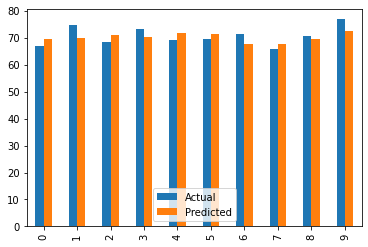

In [ ]:
from sklearn.metrics import mean_squared_error
model1 = LinearRegression()
model1.fit(xTrainMeansLinReg, yTrain.values.ravel())
# check accuracy score
print(model1.score(xTestMeansLinReg, yTest.values.ravel()))
y_pred1=model1.predict(xTestMeansLinReg)
evaluate1 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred1.flatten()})

evaluate1.head(10).plot(kind = 'bar')
print(mean_squared_error(yTest.values.ravel(), y_pred1))


0.3415458186977071
7.0391924479306125


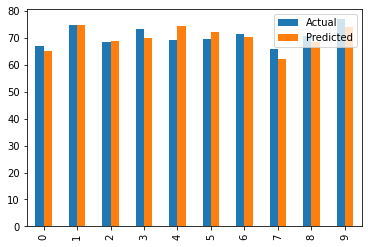

In [ ]:
model1 = LinearRegression()
model1.fit(xTrain2018LinReg, yTrain.values.ravel())
# check accuracy score
print(model1.score(xTest2018LinReg, yTest.values.ravel()))
y_pred1=model1.predict(xTest2018LinReg)
evaluate1 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred1.flatten()})

evaluate1.head(10).plot(kind = 'bar')
print(mean_squared_error(yTest.values.ravel(), y_pred1))


Random Forest

0.7064885488416102
3.137778829635473


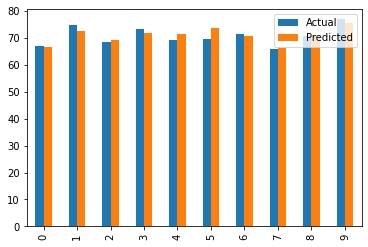

In [ ]:
model2 = RandomForestRegressor(bootstrap=True, max_depth=70, max_features='auto', min_samples_leaf=2, min_samples_split=2, n_estimators=1400)
model2.fit(xTrainMeansRandFor, yTrain.values.ravel())
# check accuracy score
print(model2.score(xTestMeansRandFor, yTest.values.ravel()))
y_pred2=model2.predict(xTestMeansRandFor)
evaluate2 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred2.flatten()})
evaluate2.head(10).plot(kind = 'bar')
print(mean_squared_error(yTest.values.ravel(), y_pred2))


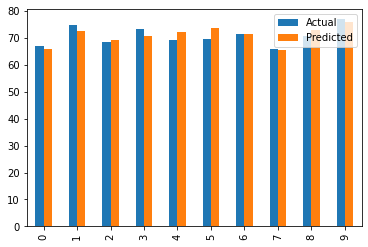

In [ ]:
evaluate2.plot(kind = 'bar')

0.5920472769110927
4.361211165521935


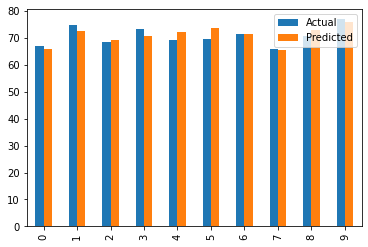

In [ ]:
model2 = RandomForestRegressor(bootstrap=True, max_depth=40, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=800)
model2.fit(xTrain2018RandFor, yTrain.values.ravel())
# check accuracy score
print(model2.score(xTest2018RandFor, yTest.values.ravel()))
y_pred2=model2.predict(xTest2018RandFor)
evaluate2 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred2.flatten()})
evaluate2.head(10).plot(kind = 'bar')
print(mean_squared_error(yTest.values.ravel(), y_pred2))


SVM

-5.612974773630478
70.69588652748557


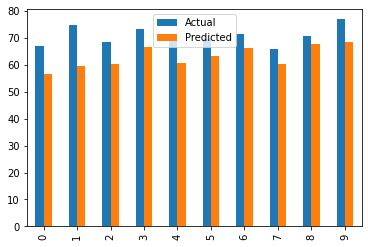

In [ ]:
model3 = LinearSVR()
model3.fit(xTrainMeansSVM, yTrain.values.ravel())
# check accuracy score
print(model3.score(xTestMeansSVM, yTest.values.ravel()))
y_pred3=model3.predict(xTestMeansSVM)
evaluate3 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred3.flatten()})

evaluate3.head(10).plot(kind = 'bar')
print(mean_squared_error(yTest.values.ravel(), y_pred3))


-15.28794528715332
174.12598281458799


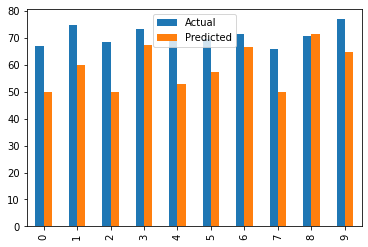

In [ ]:
model3 = LinearSVR()
model3.fit(xTrain2018SVM, yTrain.values.ravel())
# check accuracy score
print(model3.score(xTest2018SVM, yTest.values.ravel()))
y_pred3=model3.predict(xTest2018SVM)
evaluate3 = pd.DataFrame({'Actual': yTest.values.flatten(), 'Predicted': y_pred3.flatten()})

evaluate3.head(10).plot(kind = 'bar')
print(mean_squared_error(yTest.values.ravel(), y_pred3))
